In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Mushroom.csv')
df

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df=pd.DataFrame(data=df)

In [4]:
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=['classes','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [5]:
data=df.drop('classes',axis=1)

In [6]:
target=df['classes']
target

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: classes, Length: 8124, dtype: int32

In [7]:
pca=PCA(n_components=10)
data=pca.fit_transform(data)
data

array([[ 0.22820662, -0.34547209, -1.42442514, ...,  3.64358855,
        -0.92581182,  0.36680766],
       [-1.93656097,  4.79691211, -3.51166784, ..., -0.61776406,
         0.23213088,  0.07507515],
       [-1.65417317,  2.46436226, -3.88082715, ...,  0.66746969,
        -0.18841658,  0.33120588],
       ...,
       [-1.86050705,  0.47024368,  1.19021189, ...,  1.09550111,
        -0.23495457, -0.25898422],
       [ 7.29306843, -1.25169255, -1.24197629, ...,  1.25810698,
        -0.31653774, -0.58907278],
       [-4.83553281, -3.58375805, -0.11250607, ..., -0.42149836,
         0.42627554, -0.06795613]])

In [8]:
data=pd.DataFrame(data=data)
data[10]=target

In [9]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.228207,-0.345472,-1.424425,-1.246722,2.088737,2.645915,-1.032036,3.643589,-0.925812,0.366808,1
1,-1.936561,4.796912,-3.511668,-1.245720,0.551144,-0.283909,2.550317,-0.617764,0.232131,0.075075,0
2,-1.654173,2.464362,-3.880827,1.222505,1.043965,-2.052608,-2.190863,0.667470,-0.188417,0.331206,0
3,-1.252026,1.679664,-3.565488,0.586997,0.679516,2.792790,-0.396476,4.161473,-1.013877,-0.498926,1
4,1.581220,-1.002043,-1.255760,-1.970625,0.070293,3.301132,-1.258234,-2.004355,0.602214,-1.342796,0
...,...,...,...,...,...,...,...,...,...,...,...
8119,-6.469823,-2.308511,0.588111,1.118114,0.617045,1.426498,-1.800509,0.158004,0.106866,-0.649487,0
8120,-6.525909,-2.280695,1.431399,0.329901,0.274762,1.946724,0.208437,1.467637,-0.291823,-0.433137,0
8121,-1.860507,0.470244,1.190212,-0.306579,0.364383,0.053368,-2.843708,1.095501,-0.234955,-0.258984,0
8122,7.293068,-1.251693,-1.241976,0.781739,-1.592310,0.043870,-0.311706,1.258107,-0.316538,-0.589073,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 11 columns):
0     8124 non-null float64
1     8124 non-null float64
2     8124 non-null float64
3     8124 non-null float64
4     8124 non-null float64
5     8124 non-null float64
6     8124 non-null float64
7     8124 non-null float64
8     8124 non-null float64
9     8124 non-null float64
10    8124 non-null int32
dtypes: float64(10), int32(1)
memory usage: 666.5 KB


In [11]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [12]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8124.000000
mean,1.714587e-15,-1.168440e-15,2.561873e-16,2.016550e-15,6.899536e-16,2.895545e-16,7.210163e-16,-1.819623e-17,5.265155e-16,-4.543933e-19,0.482029
std,4.157262e+00,2.913540e+00,2.507936e+00,1.865351e+00,1.727795e+00,1.614662e+00,1.546364e+00,1.414538e+00,1.353403e+00,1.151859e+00,0.499708
min,-7.186581e+00,-6.733563e+00,-7.322374e+00,-5.549168e+00,-3.563351e+00,-4.305893e+00,-4.433678e+00,-4.034428e+00,-4.612439e+00,-2.134282e+00,0.000000
25%,-3.121464e+00,-2.126469e+00,-1.442189e+00,-1.221971e+00,-1.163555e+00,-1.216192e+00,-1.088275e+00,-9.826112e-01,-4.239836e-01,-1.038800e+00,0.000000
50%,-9.707330e-01,-6.256058e-01,-1.299987e-01,-1.626013e-01,-2.876669e-01,4.453744e-02,-1.220978e-01,1.293425e-01,1.191560e-02,-6.774831e-02,0.000000
75%,1.889445e+00,1.808065e+00,1.384977e+00,9.546671e-01,8.490598e-01,9.992095e-01,1.162319e+00,9.841373e-01,4.748488e-01,8.647300e-01,1.000000
max,7.917838e+00,8.152221e+00,8.837761e+00,9.092527e+00,6.138878e+00,4.724657e+00,5.128358e+00,4.693669e+00,4.656484e+00,3.037611e+00,1.000000


In [13]:
for col in data.columns.values:
    print("Number of unique values of{} :{} ".format(col,data[col].nunique()))

Number of unique values of0 :8124 
Number of unique values of1 :8124 
Number of unique values of2 :8124 
Number of unique values of3 :8124 
Number of unique values of4 :8124 
Number of unique values of5 :8124 
Number of unique values of6 :8124 
Number of unique values of7 :8124 
Number of unique values of8 :8124 
Number of unique values of9 :8124 
Number of unique values of10 :2 


In [14]:
data.skew()

0     0.635138
1     0.574512
2     0.444208
3     0.793095
4     0.741290
5     0.189428
6    -0.053544
7    -0.097630
8     0.022523
9     0.311111
10    0.071946
dtype: float64

In [15]:
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [16]:
data.skew()

0    -1.093706
1    -1.394667
2     0.444208
3    -1.323269
4    -1.457443
5     0.189428
6    -0.053544
7    -0.097630
8     0.022523
9     0.311111
10    0.071946
dtype: float64

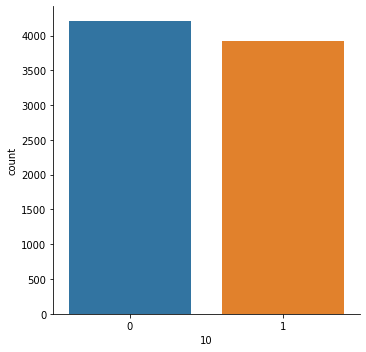

In [17]:
sns.catplot(x=10,data=data,kind='count')

In [18]:
data.isnull().sum()

0     4025
1     3438
2        0
3     2428
4     2350
5        0
6        0
7        0
8        0
9        0
10       0
dtype: int64

In [19]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imp=imputer.fit(data)
df_titanic=imp.fit_transform(data.values)
print(df_titanic)
df_new=pd.DataFrame(data=df_titanic)
df_new

[[ 0.20555508 -0.42384105 -1.42442514 ... -0.92581182  0.36680766
   1.        ]
 [ 0.80518601  1.75732538 -3.51166784 ...  0.23213088  0.07507515
   0.        ]
 [ 0.80518601  1.24252856 -3.88082715 ... -0.18841658  0.33120588
   0.        ]
 ...
 [ 0.80518601  0.38542815  1.19021189 ... -0.23495457 -0.25898422
   0.        ]
 [ 2.11542004  0.54171536 -1.24197629 ... -0.31653774 -0.58907278
   1.        ]
 [ 0.80518601  0.54171536 -0.11250607 ...  0.42627554 -0.06795613
   0.        ]]


,0,1,2,3,4,5,6,7,8,9,10
0,0.205555,-0.423841,-1.424425,0.189033,1.127762,2.645915,-1.032036,3.643589,-0.925812,0.366808,1.0
1,0.805186,1.757325,-3.511668,0.189033,0.438993,-0.283909,2.550317,-0.617764,0.232131,0.075075,0.0
2,0.805186,1.242529,-3.880827,0.798635,0.714892,-2.052608,-2.190863,0.667470,-0.188417,0.331206,0.0
3,0.805186,0.985691,-3.565488,0.461844,0.518506,2.792790,-0.396476,4.161473,-1.013877,-0.498926,1.0
4,0.948262,0.541715,-1.255760,0.189033,0.067932,3.301132,-1.258234,-2.004355,0.602214,-1.342796,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8119,0.805186,0.541715,0.588111,0.750526,0.480600,1.426498,-1.800509,0.158004,0.106866,-0.649487,0.0
8120,0.805186,0.541715,1.431399,0.285104,0.242760,1.946724,0.208437,1.467637,-0.291823,-0.433137,0.0
8121,0.805186,0.385428,1.190212,-0.366118,0.310703,0.053368,-2.843708,1.095501,-0.234955,-0.258984,0.0
8122,2.115420,0.541715,-1.241976,0.577590,0.095623,0.043870,-0.311706,1.258107,-0.316538,-0.589073,1.0


In [20]:
df_new.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

(11.0, 0.0)

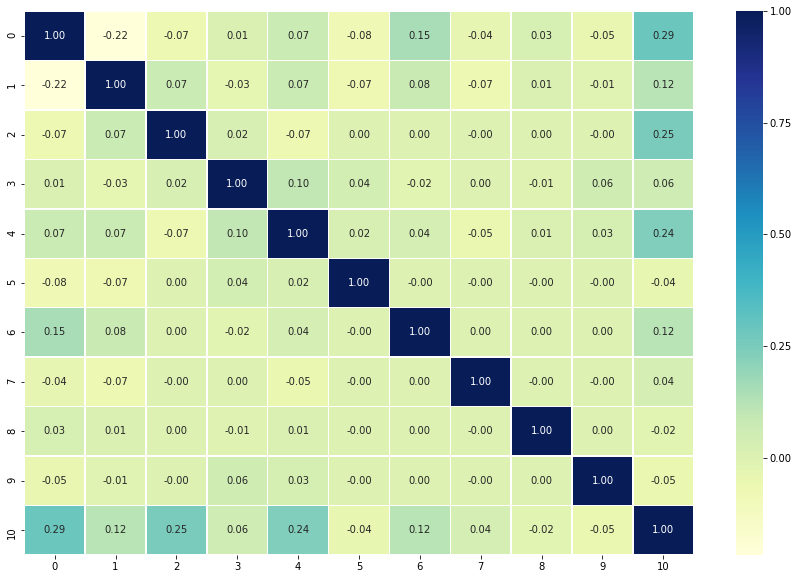

In [21]:
corr_matrix = df_new.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [22]:
df_new.shape

(8124, 11)

In [23]:
df_new.skew()

0    -1.539458
1    -1.836097
2     0.444208
3    -1.580207
4    -1.728643
5     0.189428
6    -0.053544
7    -0.097630
8     0.022523
9     0.311111
10    0.071946
dtype: float64

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
print(df_new.shape)
df_mushroom=df_new.loc[(z<3).all(axis=1)]
print(df_mushroom.shape)

(8124, 11)
(7311, 11)


In [25]:
x=df_mushroom.iloc[:,0:-1]
x

,0,1,2,3,4,5,6,7,8,9
0,0.205555,-0.423841,-1.424425,0.189033,1.127762,2.645915,-1.032036,3.643589,-0.925812,0.366808
1,0.805186,1.757325,-3.511668,0.189033,0.438993,-0.283909,2.550317,-0.617764,0.232131,0.075075
2,0.805186,1.242529,-3.880827,0.798635,0.714892,-2.052608,-2.190863,0.667470,-0.188417,0.331206
3,0.805186,0.985691,-3.565488,0.461844,0.518506,2.792790,-0.396476,4.161473,-1.013877,-0.498926
4,0.948262,0.541715,-1.255760,0.189033,0.067932,3.301132,-1.258234,-2.004355,0.602214,-1.342796
...,...,...,...,...,...,...,...,...,...,...
8119,0.805186,0.541715,0.588111,0.750526,0.480600,1.426498,-1.800509,0.158004,0.106866,-0.649487
8120,0.805186,0.541715,1.431399,0.285104,0.242760,1.946724,0.208437,1.467637,-0.291823,-0.433137
8121,0.805186,0.385428,1.190212,-0.366118,0.310703,0.053368,-2.843708,1.095501,-0.234955,-0.258984
8122,2.115420,0.541715,-1.241976,0.577590,0.095623,0.043870,-0.311706,1.258107,-0.316538,-0.589073


In [26]:
y=df_mushroom.iloc[:,-1]
y

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
8119    0.0
8120    0.0
8121    0.0
8122    1.0
8123    0.0
Name: 10, Length: 7311, dtype: float64

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22)

In [28]:
from sklearn.naive_bayes import GaussianNB

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
         }

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(58)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [29]:

model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores


{'Logistic Regression': 0.7520198881292729,
 'KNN': 0.9838408949658173,
 'Random Forest': 0.9937849596022374,
 'GaussianNB': 0.7855811062771908,
 'SVC': 0.9912989434431324,
 'DecisionTreeClassifier': 0.9906774394033562}

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
models = {"Random Forest": RandomForestClassifier(n_estimators=100),
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier()
         }
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=58,test_size=.20)

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_acc_scores = {}
    # Loop through models
    for name, model in models.items():
        y_pred1=0
        # Fit the model to the data
        model.fit(x_train, y_train)
        y_pred1=model.predict(x_test)
        # Evaluate the model and append its score to model_scores
        model_acc_scores[name] = accuracy_score(y_test,y_pred1)

    return model_acc_scores

In [31]:
model_acc_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test,
                             )

model_acc_scores

{'Random Forest': 1.0,
 'Logistic Regression': 0.7265892002734108,
 'KNN': 0.9883800410116199,
 'GaussianNB': 0.7559808612440191,
 'SVC': 0.9931647300068353,
 'DecisionTreeClassifier': 0.9876965140123035,
 'GradientBoostingClassifier': 0.9569377990430622}

In [32]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.20)
    rm=RandomForestClassifier(n_estimators=100)
    rm.fit(x_train,y_train)
    y_predrm=rm.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predrm)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 94 is: 1.0


In [33]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.20)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_predknn=knn.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predknn)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 94 is: 0.9952153110047847


In [34]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
    svc=SVC()
    svc.fit(x_train,y_train)
    y_predsvc=svc.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predsvc)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 91 is: 0.997513983840895


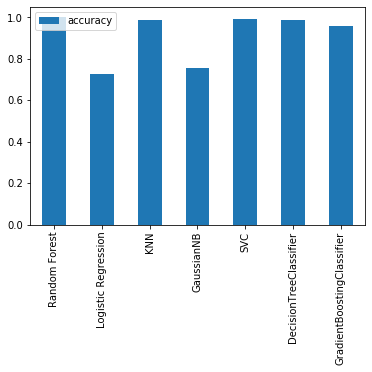

In [35]:
model_compare = pd.DataFrame(model_acc_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=58,test_size=.20)
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rfpred=rf.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,rfpred))
print('Confusion Matrix:',confusion_matrix(y_test,rfpred))
print('Classification Report:',classification_report(y_test,rfpred))

Accuracy Score: 1.0
Confusion Matrix: [[782   0]
 [  0 681]]
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       782
         1.0       1.00      1.00      1.00       681

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463



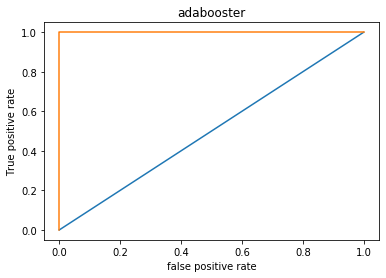

In [37]:
# Make predictions with probabilities
y_probs = rf.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='adabooster')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('adabooster')
plt.show()


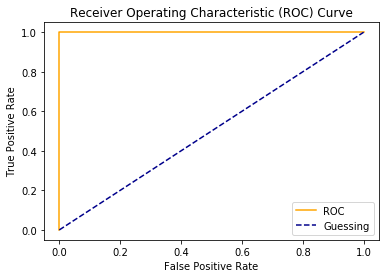

In [38]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

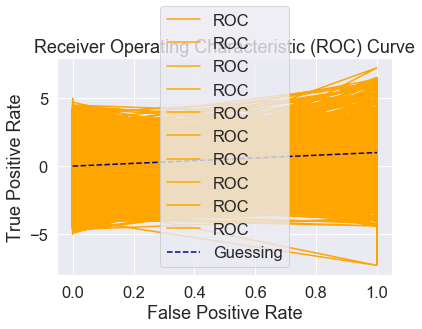

In [47]:
plot_roc_curve(rfpred, x_test)

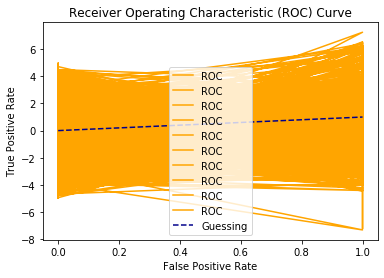

In [40]:
plot_roc_curve(y_test, x_test)

In [41]:
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [42]:
y_predrf= evaluate_preds(y_test, rfpred)
y_predrf

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

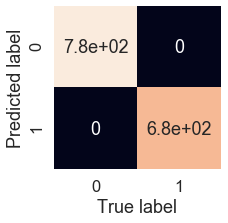

In [43]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, rfpred):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, rfpred),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, rfpred)

In [44]:
from sklearn.externals import joblib
joblib.dump(rf,'mushroom_predict.pkl')

['mushroom_predict.pkl']

In [45]:
rf_from_joblib=joblib.load('mushroom_predict.pkl')
joblib_y_preds = rf_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}